In [1]:
# A brief of Pulsar dataset

In [2]:
'''
HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable 
scientific interest as probes of space-time, the inter-stellar medium, and states of matter .

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable 
pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves 
looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal 
detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation.
In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all 
detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification
systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the
legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples
have all been checked by human annotators.

Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and
1 (positive).
'''

"\nHTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey .\n\nPulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable \nscientific interest as probes of space-time, the inter-stellar medium, and states of matter .\n\nAs pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable \npattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves \nlooking for periodic radio signals with large radio telescopes.\n\nEach pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal \ndetection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation.\nIn the absence of additional info, each candidate could potentially d

In [3]:
# Importing all necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [5]:
# Loading Dataset

In [6]:
star=pd.read_csv("C://Users//acer//Desktop//1sem//python//predicting-a-pulsar-star//star.csv")

In [7]:
# Looking first few rows 

In [8]:
star.head(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0


In [9]:
# Looking at the last few rows

In [10]:
star.tail(3)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [11]:
# Looking at all columns 

In [12]:
star.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [13]:
# Looking at all columns datatype

In [14]:
star.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [15]:
# Looking at the basic stats value

In [16]:
star.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [17]:
# Looking at the size of dataset

In [18]:
star.shape

(17898, 9)

In [19]:
# Looking for the null values

In [20]:
star.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [21]:
# Lets change the columns name for easy access

In [22]:
star.rename(columns={" Mean of the integrated profile":"m_ip"," Standard deviation of the integrated profile":"sd_ip",
                    " Excess kurtosis of the integrated profile":"k_ip"," Skewness of the integrated profile":"s_ip",
                    " Mean of the DM-SNR curve":"m_dm"," Standard deviation of the DM-SNR curve":"sd_dm",
                    " Excess kurtosis of the DM-SNR curve":"k_dm"," Skewness of the DM-SNR curve":"s_dm"},inplace=True)

In [23]:
# Lets look at the renamed dataset

In [24]:
star.head(3)

,m_ip,sd_ip,k_ip,s_ip,m_dm,sd_dm,k_dm,s_dm,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0


In [25]:
# Loking at the target variable

In [26]:
star.groupby("target_class").size()

target_class
0    16259
1     1639
dtype: int64

In [27]:
# Data Visualization

In [28]:
# Countplot

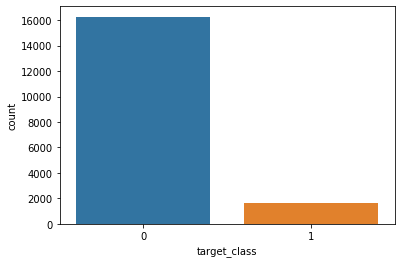

In [29]:
sns.countplot(x="target_class",data=star)

In [30]:
# Scatter plot

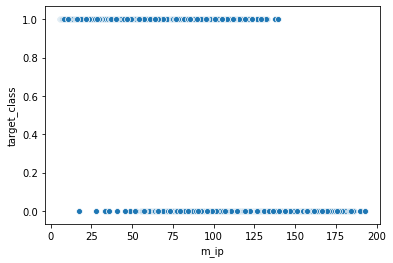

In [31]:
sns.scatterplot(x="m_ip",y="target_class",data=star)

In [32]:
# Heat map 

In [33]:
star_corr=star.corr()

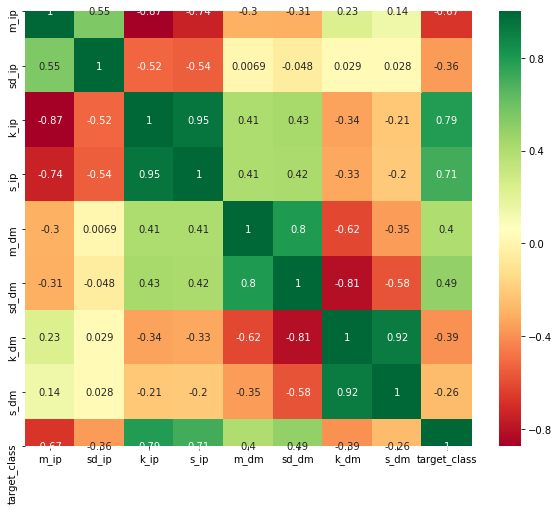

In [34]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(star_corr,annot=True,cmap="RdYlGn")

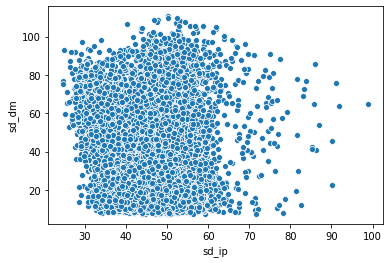

In [35]:
sns.scatterplot(x="sd_ip",y="sd_dm",data=star)

In [36]:
# Pair plot

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


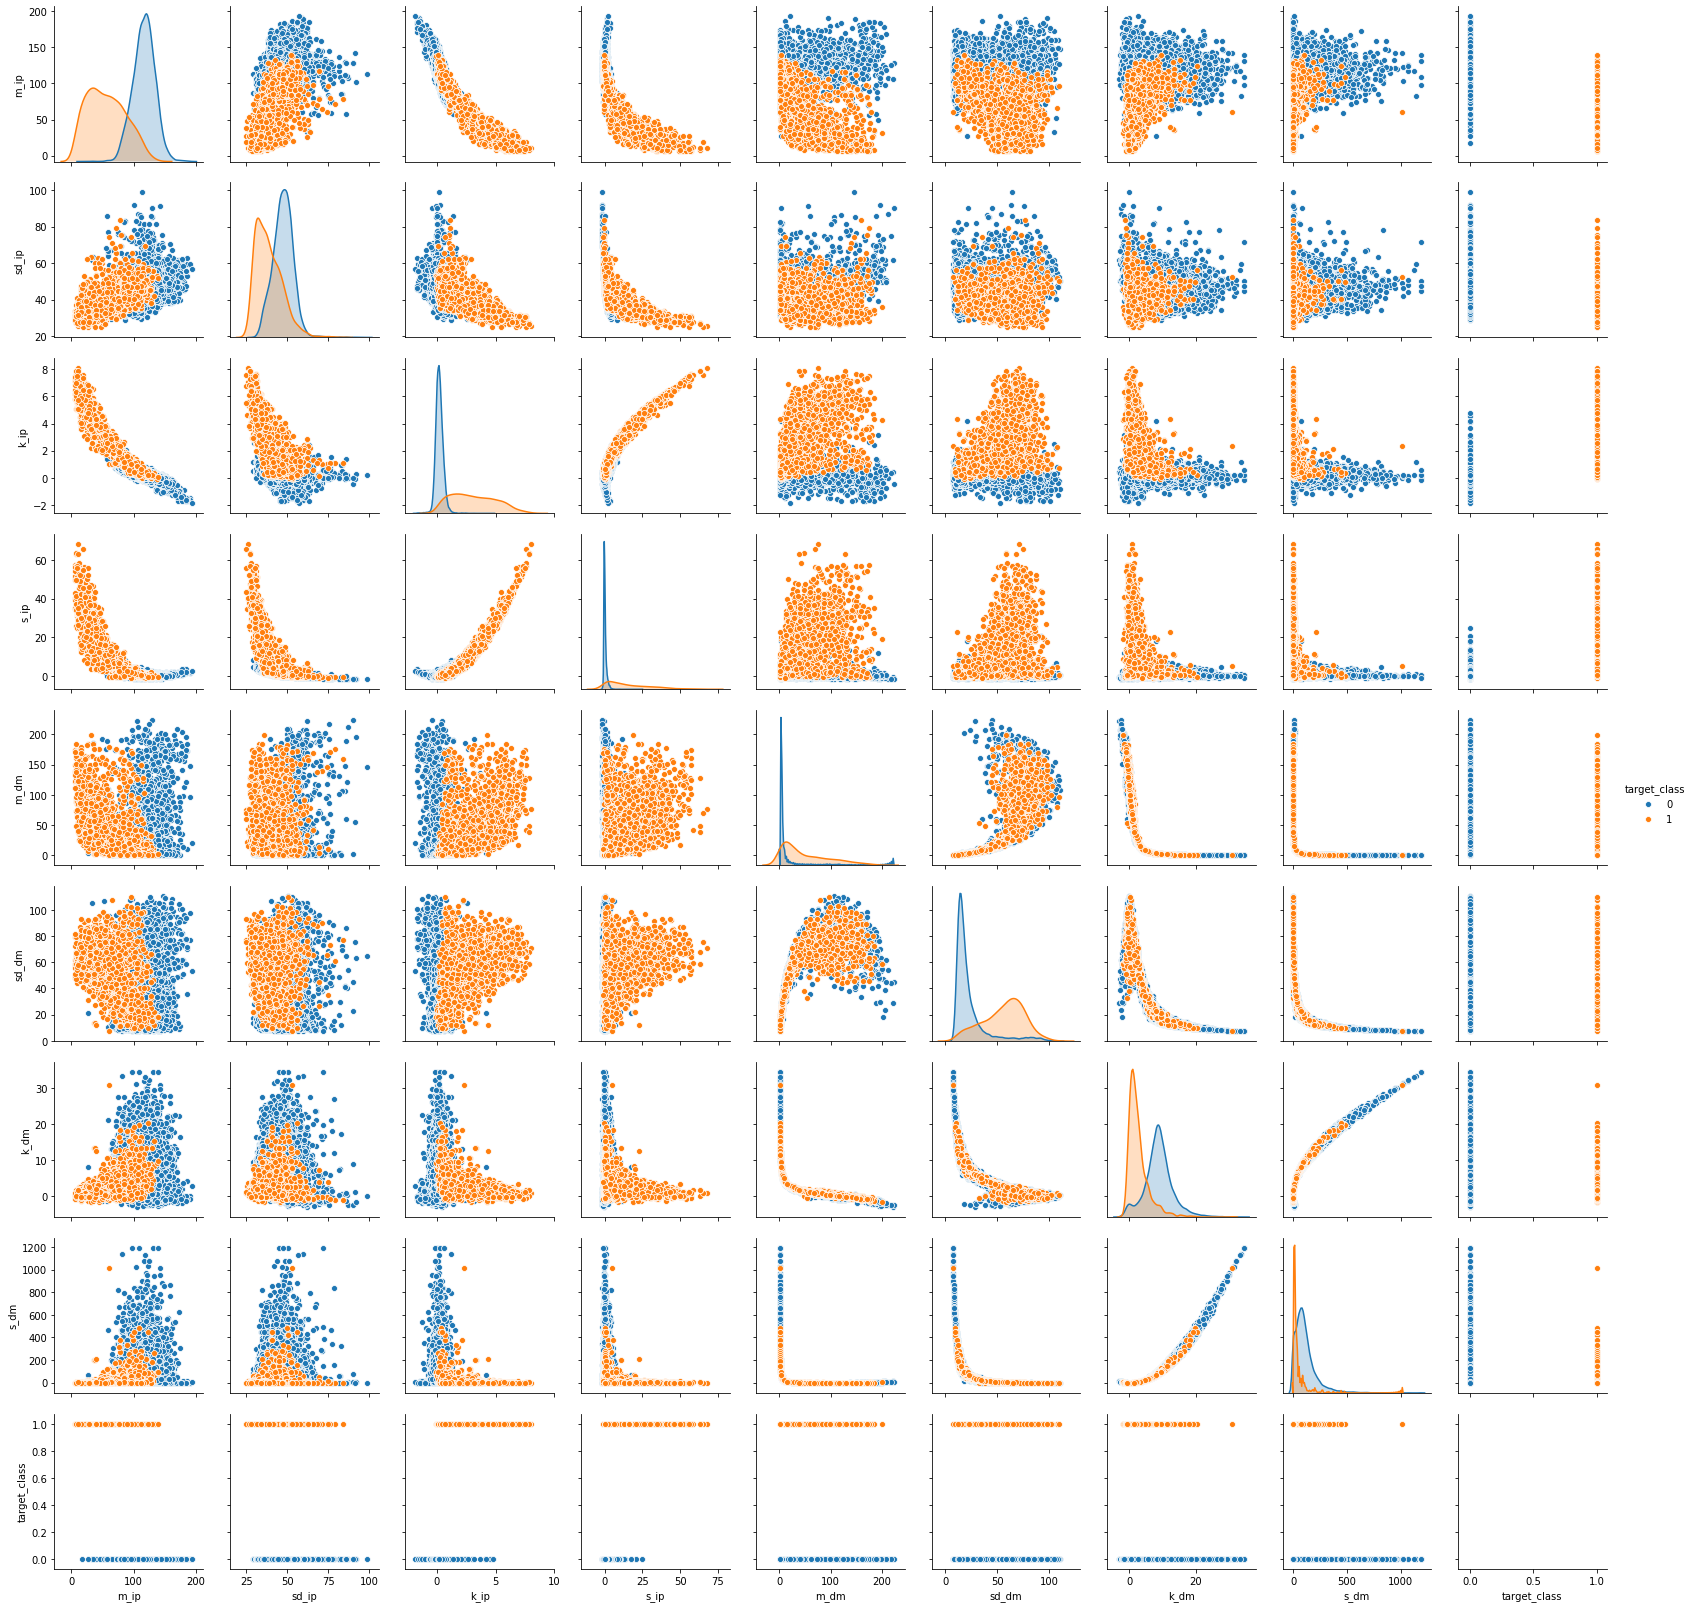

In [37]:
sns.pairplot(star,hue="target_class")

In [38]:
# Using histogram

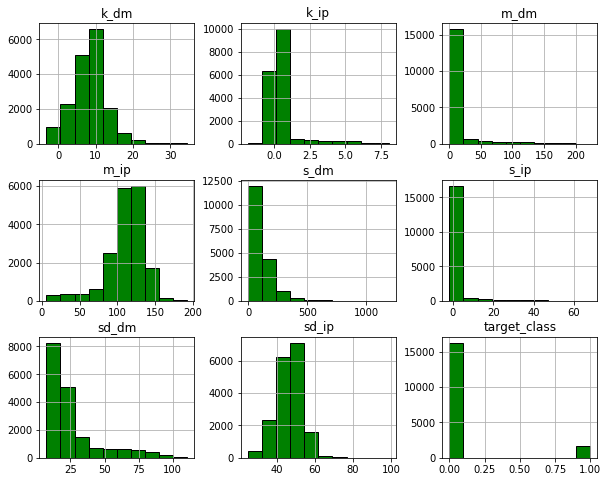

In [39]:
star.hist(figsize=(10,8),color="green",edgecolor="black")
plt.show()

In [40]:
# Removing duplicate data

In [41]:
star.drop_duplicates(inplace=True)

In [42]:
# Lets look at the shape of data

In [43]:
star.shape

(17898, 9)

In [44]:
# Splitting dataset

In [45]:
y=star["target_class"]
x=star.drop("target_class",axis=1)

In [46]:
# Applying train test split for training and testing data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [48]:
# Lets see shape of training and testing dataset whther we have accurately splitted dataset

In [49]:
print("Shape of x_train is :",x_train.shape)
print("Shape of y_train is :",y_train.shape)
print("Shape of x_test is :",x_test.shape)
print("Shape of y_test is :",y_test.shape)

Shape of x_train is : (12528, 8)
Shape of y_train is : (12528,)
Shape of x_test is : (5370, 8)
Shape of y_test is : (5370,)


In [50]:
# Lets apply Machine Learning algorith

In [51]:
# Applying Logistic regression 

In [52]:
lr=LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

In [53]:
output=pd.DataFrame({"Actual":y_test,"Precticted":prediction})
print(output)

       Actual  Precticted
15985       0           0
8188        1           1
8157        0           0
2589        1           0
11909       0           0
...       ...         ...
12653       0           0
6454        0           0
530         0           0
1540        0           0
6921        1           0

[5370 rows x 2 columns]


In [54]:
# Lets check accuracy of our model

In [55]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is {}".format(cohen_kappa_score(y_test, prediction)))
print("Sensitiviy is {}".format(recall_score(y_test, prediction)))
print("Precision is {}".format(precision_score(y_test, prediction)))
print("R2 score is {}".format(r2_score(y_test,prediction)))
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("Area under curve is {}".format(auc(fpr,tpr)))

accuracy score is 0.978584729981378
Kappa is 0.861578642293928
Sensitiviy is 0.8148148148148148
Precision is 0.9406175771971497
R2 score is 0.7398282120504343
Area under curve is 0.9048480298480299


In [56]:
# Lets apply another ML algo on this dataset to see whether we can increase the model accuracy further 

In [57]:
dt=DecisionTreeClassifier()
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [58]:
# Comparing prediction of model with actual values

In [59]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
15985       0          0
8188        1          1
8157        0          0
2589        1          0
11909       0          0
...       ...        ...
12653       0          0
6454        0          0
530         0          0
1540        0          0
6921        1          0

[5370 rows x 2 columns]


In [60]:
# Lets check accuracy of our model 

In [61]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is {}".format(cohen_kappa_score(y_test, prediction)))
print("Sensitiviy is {}".format(recall_score(y_test, prediction)))
print("Precision is {}".format(precision_score(y_test, prediction)))
print("R2 score is {}".format(r2_score(y_test,prediction)))
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("Area under curve is {}".format(auc(fpr,tpr)))

accuracy score is 0.9705772811918063
Kappa is 0.8209415226744937
Sensitiviy is 0.8353909465020576
Precision is 0.8388429752066116
R2 score is 0.6425465869910314
Area under curve is 0.9097102152657707


In [62]:
# Lets apply another ML algo on this dataset to see whether we can increase the model accuracy further 

In [63]:
rf=RandomForestClassifier()
rf=RandomForestClassifier(criterion="entropy",max_depth=20,n_estimators=100)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

In [64]:
# Comparing prediction of model with actual values

In [65]:
output=pd.DataFrame({"Actual":y_test,"Predicted":prediction})
print(output)

       Actual  Predicted
15985       0          0
8188        1          1
8157        0          0
2589        1          0
11909       0          0
...       ...        ...
12653       0          0
6454        0          0
530         0          0
1540        0          0
6921        1          0

[5370 rows x 2 columns]


In [66]:
# Lets check accuracy of our model 

In [67]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is {}".format(cohen_kappa_score(y_test, prediction)))
print("Sensitiviy is {}".format(recall_score(y_test, prediction)))
print("Precision is {}".format(precision_score(y_test, prediction)))
print("R2 score is {}".format(r2_score(y_test,prediction)))
fpr, tpr, thresholds = roc_curve(y_test, prediction)
print("Area under curve is {}".format(auc(fpr,tpr)))

accuracy score is 0.9802607076350093
Kappa is 0.8735336461554868
Sensitiviy is 0.8333333333333334
Precision is 0.9418604651162791
R2 score is 0.7601894824117046
Area under curve is 0.9141072891072892


In [68]:
'''
Hence we can conclude that Random Forest model fits best on this dataset which is proved by its accuracy on test dataset.
'''

'\nHence we can conclude that Logistic regression model fits best on this dataset which is proved by its accuracy on test dataset.\n'